# Project nr 2 - serving models with BentoML

## 1. Model-Serving Configuration
You can find it in the [service.py](service.py) file

In the terminal run
```
bentoml serve service.py
```

## 2. Client Request Example

In [ ]:
import requests
import io
from PIL import Image

from torchvision import datasets, transforms
import numpy as np

testset = datasets.MNIST(
    "lightning/data", download=True, train=True, transform=transforms.ToTensor()
)

# Test with a single image
test_image = testset[0][0]
test_image_pil = Image.fromarray((test_image.squeeze().numpy() * 255).astype(np.uint8))

# Convert PIL image to bytes
img_byte_arr = io.BytesIO()
test_image_pil.save(img_byte_arr, format='PNG')
img_byte_arr.seek(0)

# Send request to the endpoint
url = "http://localhost:3000/predict"
files = {'images': ('test.png', img_byte_arr, 'image/png')}

response = requests.post(url, files=files)
print(f"Status code: {response.status_code}, Response: {response.json()}")

Status code: 200, Response: [5]


Bentoml output:
```
2025-11-20T23:59:59+0100 [INFO] [entry_service:MnistClassifierService:1] Service MnistClassifierService initialized
2025-11-20T23:59:59+0100 [INFO] [entry_service:MnistClassifierService:1] 127.0.0.1:51192 (scheme=http,method=POST,path=/predict,type=multipart/form-data; boundary=211b05953551f161abc35d95cb2dcbc3,length=484) (status=200,type=application/json,length=3) 20.551ms (trace=6803a5b362dff334fcf121b955f85293,span=55d41ec5f1514e42,sampled=0,service.name=MnistClassifierService)
```

## 3. Working output

Images


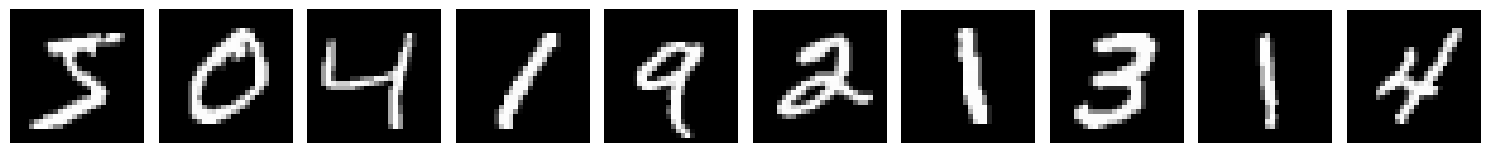

Predictions: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [ ]:
import matplotlib.pyplot as plt

files_list = []
for i in range(10):
    img = testset[i][0]
    img_pil = Image.fromarray((img.squeeze().numpy() * 255).astype(np.uint8))
    img_bytes = io.BytesIO()
    img_pil.save(img_bytes, format='PNG')
    img_bytes.seek(0)
    files_list.append(('images', (f'test_{i}.png', img_bytes, 'image/png')))

print("Images:")
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for idx in range(10):
    img = testset[idx][0]
    axes[idx].imshow(img.squeeze(), cmap='gray')
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

response = requests.post(url, files=files_list)
print(f"Predictions: {response.json()}")